# Combining Two Files

In [8]:
from load_trajectories import get_timestamps, load_trajectories, get_unique_SDs
# Using the NPL 2024a kernel
import os
import os.path

#for calculating the air temperature
from metpy.units import units
from metpy.calc import temperature_from_potential_temperature

#time
from datetime import timedelta

import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

import math

# Environmental Data File

In [9]:
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200"
fn = "cm1out_only_upto35.nc"
newncfilepath = os.path.join(dirpath, fn)
print(newncfilepath)

/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200/cm1out_only_upto35.nc


In [10]:
#Opened the netcdf files into a Dataset
nc = xr.open_dataset(newncfilepath)
nc

<xarray.Dataset>
Dimensions:   (one: 1, time: 105, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nk: 140, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    tke       (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [11]:
#Selecting certain data variables
selected_vars = ['rh', 'th', 'prs', 'uinterp', 'vinterp', 'winterp', 'out8', 'out9', 'out10', 'out11', 'out12', 'out13', 'out14', 'deactrat', 'xh', 'yh', 'yf', 'z', 'zf']
selected_data = nc[selected_vars]
selected_data

<xarray.Dataset>
Dimensions:   (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/19)
    rh        (time, nk, nj, ni) float32 ...
    th        (time, nk, nj, ni) float32 ...
    prs       (time, nk, nj, ni) float32 ...
    uinterp   (time, nk, nj, ni) float32 ...
    vinterp   (time, nk, nj, ni) float32 ...
    winterp   (time, nk, nj, ni) float32 ...
    ...        ...
    deactrat  (time, nk, nj, ni) float32 ...
    xh        (ni) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    z         (nk) float32 ...
    zf        (nkp1) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [12]:
selected_data['xh'].values

array([ 0.05      ,  0.15      ,  0.25      ,  0.35000002,  0.45000002,
        0.55      ,  0.65000004,  0.75000006,  0.85      ,  0.95000005,
        1.0500001 ,  1.1500001 ,  1.25      ,  1.35      ,  1.45      ,
        1.5500001 ,  1.6500001 ,  1.7500001 ,  1.8500001 ,  1.95      ,
        2.0500002 ,  2.15      ,  2.25      ,  2.3500001 ,  2.45      ,
        2.5500002 ,  2.65      ,  2.7500002 ,  2.8500001 ,  2.95      ,
        3.0500002 ,  3.15      ,  3.2500002 ,  3.3500001 ,  3.45      ,
        3.5500002 ,  3.65      ,  3.7500002 ,  3.8500001 ,  3.9500003 ,
        4.05      ,  4.15      ,  4.25      ,  4.3500004 ,  4.4500003 ,
        4.55      ,  4.65      ,  4.75      ,  4.8500004 ,  4.9500003 ,
        5.05      ,  5.15      ,  5.2500005 ,  5.3500004 ,  5.4500003 ,
        5.55      ,  5.65      ,  5.7500005 ,  5.8500004 ,  5.9500003 ,
        6.05      ,  6.15      ,  6.2500005 ,  6.3500004 ,  6.4500003 ,
        6.55      ,  6.65      ,  6.7500005 ,  6.8500004 ,  6.95

In [13]:
#Calculating for the Air Temperature
selected_data['air_temp'] = selected_data['th'] * (selected_data['prs'] / 101325) ** .286
selected_data

<xarray.Dataset>
Dimensions:   (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh        (time, nk, nj, ni) float32 ...
    th        (time, nk, nj, ni) float32 ...
    prs       (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp   (time, nk, nj, ni) float32 ...
    vinterp   (time, nk, nj, ni) float32 ...
    winterp   (time, nk, nj, ni) float32 ...
    ...        ...
    xh        (ni) float32 0.05 0.15 0.25 0.35 0.45 ... 11.65 11.75 11.85 11.95
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    z         (nk) float32 ...
    zf        (nkp1) float32 ...
    air_temp  (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [14]:
# Converts time [ns] in time [seconds]
selected_data['time_seconds'] = nc['time'].values / np.timedelta64(1, 's')
selected_data['time_seconds'] = selected_data['time_seconds'].astype(np.int32)
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141,
                   time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    xh            (ni) float32 0.05 0.15 0.25 0.35 ... 11.65 11.75 11.85 11.95
    yh            (nj) float32 ...
    yf            (njp1) float32 ...
    z             (nk) float32 ...
    zf            (nkp1) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [15]:
#Selects only certain times in seconds
#selected_data = selected_data.sel(time_seconds = selected_data.time_seconds.isin([5160, 5220]))
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141,
                   time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    xh            (ni) float32 0.05 0.15 0.25 0.35 ... 11.65 11.75 11.85 11.95
    yh            (nj) float32 ...
    yf            (njp1) float32 ...
    z             (nk) float32 ...
    zf            (nkp1) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [16]:
# Converts the z position from km to m
selected_data['z'] = selected_data['z'] * 1000
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141,
                   time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    xh            (ni) float32 0.05 0.15 0.25 0.35 ... 11.65 11.75 11.85 11.95
    yh            (nj) float32 ...
    yf            (njp1) float32 ...
    z             (nk) float32 50.0 150.0 250.0 ... 1.385e+04 1.395e+04
    zf            (nkp1) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [17]:
#convert x km to meters
selected_data['xh'] = selected_data['xh'] * 1000
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141,
                   time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    xh            (ni) float32 50.0 150.0 250.0 ... 1.185e+04 1.195e+04
    yh            (nj) float32 ...
    yf            (njp1) float32 ...
    z             (nk) float32 50.0 150.0 250.0 ... 1.385e+04 1.395e+04
    zf            (nkp1) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [18]:
#convert y km to meters
selected_data['yh'] = selected_data['yh'] * 1000
selected_data

<xarray.Dataset>
Dimensions:       (time: 105, nk: 140, nj: 120, ni: 120, njp1: 121, nkp1: 141,
                   time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables: (12/20)
    rh            (time, nk, nj, ni) float32 ...
    th            (time, nk, nj, ni) float32 ...
    prs           (time, nk, nj, ni) float32 1.014e+05 1.014e+05 ... 1.484e+04
    uinterp       (time, nk, nj, ni) float32 ...
    vinterp       (time, nk, nj, ni) float32 ...
    winterp       (time, nk, nj, ni) float32 ...
    ...            ...
    xh            (ni) float32 50.0 150.0 250.0 ... 1.185e+04 1.195e+04
    yh            (nj) float32 50.0 150.0 250.0 ... 1.185e+04 1.195e+04
    yf            (njp1) float32 ...
    z             (nk) float32 50.0 150.0 250.0 ... 1.385e+04 1.395e+04
    zf            (nkp1) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [19]:
#Example: accessing a specific coordinate
nk_value = selected_data.sel(nk = 92, nj = 3, ni = 2)
nk_value

<xarray.Dataset>
Dimensions:       (time: 105, njp1: 121, nkp1: 141, time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: njp1, nkp1
Data variables: (12/20)
    rh            (time) float32 ...
    th            (time) float32 ...
    prs           (time) float32 3.098e+04 3.098e+04 ... 3.096e+04 3.096e+04
    uinterp       (time) float32 ...
    vinterp       (time) float32 ...
    winterp       (time) float32 ...
    ...            ...
    xh            float32 250.0
    yh            float32 350.0
    yf            (njp1) float32 ...
    z             float32 9.25e+03
    zf            (nkp1) float32 ...
    air_temp      (time) float64 232.0 231.9 231.9 231.9 ... 231.8 231.8 231.8
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [20]:
#Finds the unique times in ascending order
time = selected_data['time_seconds'].values
sorted_time = time

np.unique(np.sort(sorted_time)) #70 unique times

array([3660, 3720, 3780, 3840, 3900, 3960, 4020, 4080, 4140, 4200, 4260,
       4320, 4380, 4440, 4500, 4560, 4620, 4680, 4740, 4800, 4860, 4920,
       4980, 5040, 5100, 5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580,
       5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120, 6180, 6240,
       6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720, 6780, 6840, 6900,
       6960, 7020, 7080, 7140, 7200, 7260, 7320, 7380, 7440, 7500, 7560,
       7620, 7680, 7740, 7800], dtype=int32)

# Trajectory File

In [21]:
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200'

In [22]:
# THIS HAS 15 SECONDS
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 4 timestamps (every 1 minute)
coarse_timestamps = timestamps[0::4]

#coarse_timestamps = timestamps

# only look at 10 superdroplets 
Ns = 10
unique_superdroplets = get_unique_SDs(dirpath, coarse_timestamps[0])
first_Ns = unique_superdroplets[0:Ns]

print(coarse_timestamps)
print(first_Ns)
trajs = load_trajectories(dirpath, times=coarse_timestamps,
                         num_timesteps = 10, 
                         Ns_array = first_Ns)

[5100 5160 5220 5280 5340 5400 5460 5520 5580 5640 5700 5760 5820 5880
 5940 6000 6060 6120 6180 6240 6300 6360 6420 6480 6540 6600 6660 6720
 6780 6840 6900 6960 7020 7080 7140 7200]
[ 409  551  781  872 1422 1464 1934 3033 3531 3883]
Loading trajectories for time 5100 
Loading trajectories for time 5160 
Loading trajectories for time 5220 
Loading trajectories for time 5280 
Loading trajectories for time 5340 
Loading trajectories for time 5400 
Loading trajectories for time 5460 
Loading trajectories for time 5520 
Loading trajectories for time 5580 
Loading trajectories for time 5640 


In [23]:
trajs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,257.08756,376.495430,9206.9901,0.0,0.0,4.152454e-13,0.000006,0.000006,202.61799,108.18,15177056256,ICE,409,0.0,1,5100
551,421.27386,208.028410,9724.6130,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00263,99.55,74482008064,ICE,551,0.0,1,5100
781,417.36142,423.576800,9656.4441,0.0,0.0,7.027485e-14,0.000019,0.000019,358.66841,358.64,58047827968,ICE,781,0.0,1,5100
872,226.87752,372.240120,9514.6481,0.0,0.0,1.622385e-13,0.000045,0.000045,289.55341,289.55,35479605248,ICE,872,0.0,1,5100
1422,483.30685,37.490361,9622.7620,0.0,0.0,2.185584e-13,0.000017,0.000017,410.53663,410.45,28040101888,ICE,1422,0.0,1,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,203.18,24888346624,ICE,1934,0.0,1,5640
3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,151.36,63349731328,ICE,3531,0.0,1,5640
3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,470.91,7641418240,ICE,3883,0.0,1,5640


In [24]:
#selected the times that are present in both files
selected_data_times = selected_data['time_seconds'].values
traj_times = trajs['time'].values

time_similar = []

for i in range(len(selected_data_times)):
    if selected_data_times[i] in traj_times:
        time_similar.append(selected_data_times[i])

print(time_similar)

[5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580, 5640, 5100, 5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580, 5640]


In [25]:
# displays only the 5160 and 5220 times since those are also the times shown in the environmental data files

trajs = trajs[trajs["time"] != 5100]
trajs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160
551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160
781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160
872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160
1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,203.18,24888346624,ICE,1934,0.0,1,5640
3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,151.36,63349731328,ICE,3531,0.0,1,5640
3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,470.91,7641418240,ICE,3883,0.0,1,5640


In [26]:
trajs = trajs.reset_index()
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,203.18,24888346624,ICE,1934,0.0,1,5640
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,151.36,63349731328,ICE,3531,0.0,1,5640
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,470.91,7641418240,ICE,3883,0.0,1,5640
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,315.45,69965635584,ICE,457662,0.0,1,5640


In [27]:
x_index_array = np.zeros(len(trajs), dtype=int)
y_index_array = np.zeros(len(trajs), dtype=int)
z_index_array = np.zeros(len(trajs), dtype=int)
for index, row in trajs.iterrows():
    x_index_array[index] = (abs(row['x[m]']-selected_data['xh']).argmin())
    y_index_array[index] = (abs(row['y[m]']-selected_data['yh']).argmin())
    z_index_array[index] = (abs(row['z[m]']-selected_data['z']).argmin())

trajs['xi gridbox'] = x_index_array
trajs['yk gridbox'] = y_index_array
trajs['zh gridbox'] = z_index_array
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160,2,3,92
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160,4,2,97
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160,4,4,96
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160,2,3,95
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160,4,0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,203.18,24888346624,ICE,1934,0.0,1,5640,3,1,90
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,151.36,63349731328,ICE,3531,0.0,1,5640,3,2,96
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,470.91,7641418240,ICE,3883,0.0,1,5640,3,4,91
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,315.45,69965635584,ICE,457662,0.0,1,5640,5,5,96


In [28]:
# #X position
# superdroplets_list = [409, 551, 781, 872, 1422, 1464, 1934, 3033, 3531, 3883]
# time_list = [5160, 5220]
# current_min = 0.0
# min_array = []
# final_j = -1
# x_index_array = []

# for t in range(len(time_list)):
#     time_slice = selected_data.sel(time_seconds = time_list[t])
#     x_midpoints = selected_data['xh'].values
#     for i in range(len(superdroplets_list)):
#         closest_increment = round((trajs.loc[superdroplets_list[i], 'x[m]'].iloc[t] - 50) / 100) * 100 + 50
#         index = (closest_increment - 50)/100
#         x_index_array.append(index)

# trajs['xi gridbox'] = x_index_array
# trajs

In [29]:
# # Z position
# superdroplets_list = [409, 551, 781, 872, 1422, 1464, 1934, 3033, 3531, 3883]
# time_list = [5160, 5220]

# min_array = []
# final_j = -1
# z_index_array = []

# for t in range(len(time_list)):
#     time_slice = selected_data.sel(time_seconds = time_list[t])
#     z_midpoints = selected_data['z'].values
#     for i in range(len(superdroplets_list)):
#         closest_increment = round((trajs.loc[superdroplets_list[i], 'z[m]'].iloc[t] - 50) / 100) * 100 + 50
#         index = (closest_increment - 50)/100
#         z_index_array.append(index)

# trajs['zk gridbox'] = z_index_array
# trajs

In [30]:
# #Y position
# superdroplets_list = [409, 551, 781, 872, 1422, 1464, 1934, 3033, 3531, 3883]
# time_list = [5160, 5220]

# min_array = []
# final_j = -1
# y_index_array = []

# for t in range(len(time_list)):
#     time_slice = selected_data.sel(time_seconds = time_list[t])
#     y_midpoints = selected_data['yh'].values
#     for i in range(len(superdroplets_list)):
#         closest_increment = round((trajs.loc[superdroplets_list[i], 'y[m]'].iloc[t] - 50) / 100) * 100 + 50
#         index = (closest_increment - 50)/100
#         y_index_array.append(index)

# trajs['yj gridbox'] = y_index_array
# trajs

In [31]:
#Combine Indices and Append them to the Trajectory DataFrame
coordinates = []
for i, j, k in zip(x_index_array, y_index_array, z_index_array):
    tuple = (i, j, k)
    coordinates.append(tuple)
trajs['ijk coordinates'] = coordinates
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,15177056256,ICE,409,0.0,1,5160,2,3,92,"(2, 3, 92)"
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,74482008064,ICE,551,0.0,1,5160,4,2,97,"(4, 2, 97)"
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,58047827968,ICE,781,0.0,1,5160,4,4,96,"(4, 4, 96)"
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,35479605248,ICE,872,0.0,1,5160,2,3,95,"(2, 3, 95)"
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,28040101888,ICE,1422,0.0,1,5160,4,0,96,"(4, 0, 96)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,24888346624,ICE,1934,0.0,1,5640,3,1,90,"(3, 1, 90)"
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,63349731328,ICE,3531,0.0,1,5640,3,2,96,"(3, 2, 96)"
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,7641418240,ICE,3883,0.0,1,5640,3,4,91,"(3, 4, 91)"
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,69965635584,ICE,457662,0.0,1,5640,5,5,96,"(5, 5, 96)"


In [32]:
# Finds the exact position from the environmental data to get the relative humidity
selected_data['rh'][0,trajs['xi gridbox'].values,trajs['yk gridbox'].values,trajs['zh gridbox'].values]
RH = [selected_data['rh'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['relative humidity'] = RH
trajs
#switch the order z, y, x

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,status[-],index,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,ICE,409,0.0,1,5160,2,3,92,"(2, 3, 92)",0.407817
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,ICE,551,0.0,1,5160,4,2,97,"(4, 2, 97)",0.394934
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,ICE,781,0.0,1,5160,4,4,96,"(4, 4, 96)",0.412119
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,ICE,872,0.0,1,5160,2,3,95,"(2, 3, 95)",0.406761
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,ICE,1422,0.0,1,5160,4,0,96,"(4, 0, 96)",0.395657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,ICE,1934,0.0,1,5640,3,1,90,"(3, 1, 90)",0.401745
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,ICE,3531,0.0,1,5640,3,2,96,"(3, 2, 96)",0.421143
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,ICE,3883,0.0,1,5640,3,4,91,"(3, 4, 91)",0.427239
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,ICE,457662,0.0,1,5640,5,5,96,"(5, 5, 96)",0.380231


In [33]:
#Adding the Pressure
selected_data['prs'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
pressure = [selected_data['prs'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['pressure'] = pressure
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,index,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,409,0.0,1,5160,2,3,92,"(2, 3, 92)",0.407817,99062.906250
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,551,0.0,1,5160,4,2,97,"(4, 2, 97)",0.394934,96786.570312
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,781,0.0,1,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,872,0.0,1,5160,2,3,95,"(2, 3, 95)",0.406761,99062.953125
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,1422,0.0,1,5160,4,0,96,"(4, 0, 96)",0.395657,96786.570312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,1934,0.0,1,5640,3,1,90,"(3, 1, 90)",0.401745,97919.968750
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,3531,0.0,1,5640,3,2,96,"(3, 2, 96)",0.421143,97919.953125
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,3883,0.0,1,5640,3,4,91,"(3, 4, 91)",0.427239,97919.765625
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,457662,0.0,1,5640,5,5,96,"(5, 5, 96)",0.380231,95662.835938


In [34]:
#Adding the Potential Temperature (K)
selected_data['th'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
ptemp = [selected_data['th'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['Potential Temp (K)'] = ptemp
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,0.0,1,5160,2,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,0.0,1,5160,4,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,0.0,1,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,0.0,1,5160,2,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,0.0,1,5160,4,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,0.0,1,5640,3,1,90,"(3, 1, 90)",0.401745,97919.968750,294.665619
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,0.0,1,5640,3,2,96,"(3, 2, 96)",0.421143,97919.953125,294.631775
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,0.0,1,5640,3,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,0.0,1,5640,5,5,96,"(5, 5, 96)",0.380231,95662.835938,295.013947


In [35]:
#Adding the U Interpolated to Scalar Points (Velocity Field)
selected_data['uinterp'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
uvf = [selected_data['uinterp'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['U Interpolated to Scalar Points (Velocity Field)'] = uvf
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,1,5160,2,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,1,5160,4,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,1,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,1,5160,2,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,1,5160,4,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,1,5640,3,1,90,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,1,5640,3,2,96,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,1,5640,3,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,1,5640,5,5,96,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839


In [36]:
#Adding the V Interpolated to Scalar Points (Velocity Field)
selected_data['vinterp'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
vvf = [selected_data['vinterp'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['V Interpolated to Scalar Points (Velocity Field)'] = vvf
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,5160,2,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,5160,4,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,5160,2,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,5160,4,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,5640,3,1,90,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740,0.143552
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,5640,3,2,96,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488,0.006949
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,5640,3,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,5640,5,5,96,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839,0.057548


In [37]:
#Adding the W Interpolated to Scalar Points (Velocity Field)
selected_data['winterp'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
wvf = [selected_data['winterp'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['W Interpolated to Scalar Points (Velocity Field)'] = wvf
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,2,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,4,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,2,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,4,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,3,1,90,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740,0.143552,-0.331158
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,3,2,96,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488,0.006949,-0.297268
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,3,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,5,5,96,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839,0.057548,-0.070174


In [38]:
#Adding the mean size in um (a)
selected_data['out8'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
sizea = [selected_data['out8'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['mean size in um (a)'] = sizea
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,1,90,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740,0.143552,-0.331158,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,2,96,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488,0.006949,-0.297268,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,5,96,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839,0.057548,-0.070174,0.0


In [39]:
#Adding the mean size in um (c)
selected_data['out9'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
sizec = [selected_data['out9'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['mean size in um (c)'] = sizec
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,90,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740,0.143552,-0.331158,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,96,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488,0.006949,-0.297268,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,96,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839,0.057548,-0.070174,0.0,0.0


In [40]:
#Adding ice number mixing ratio (#/kg)
selected_data['out10'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
iceratio = [selected_data['out10'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['ice number mixing ratio (#/kg)'] = iceratio
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,"(3, 1, 90)",0.401745,97919.968750,294.665619,-0.164740,0.143552,-0.331158,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,"(3, 2, 96)",0.421143,97919.953125,294.631775,0.184488,0.006949,-0.297268,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,"(5, 5, 96)",0.380231,95662.835938,295.013947,0.017839,0.057548,-0.070174,0.0,0.0,0.0


In [41]:
#Adding mean settling velocity (m/s)
selected_data['out11'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
settleVelocity = [selected_data['out11'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['mean settling velocity (m/s)'] = settleVelocity
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,0.401745,97919.968750,294.665619,-0.164740,0.143552,-0.331158,0.0,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,0.421143,97919.953125,294.631775,0.184488,0.006949,-0.297268,0.0,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,0.380231,95662.835938,295.013947,0.017839,0.057548,-0.070174,0.0,0.0,0.0,0.0


In [42]:
#Adding mean ice density (kg/m^3)
selected_data['out12'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
iceDensity = [selected_data['out12'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['mean ice density (kg/m^3)'] = iceDensity
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s),mean ice density (kg/m^3)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0,0.0,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,97919.968750,294.665619,-0.164740,0.143552,-0.331158,0.0,0.0,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,97919.953125,294.631775,0.184488,0.006949,-0.297268,0.0,0.0,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,95662.835938,295.013947,0.017839,0.057548,-0.070174,0.0,0.0,0.0,0.0,0.0


In [43]:
#Adding standard deviation of size in um (a_std)
selected_data['out13'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
a_std = [selected_data['out13'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['standard deviation of size in um (a_std)'] = a_std
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s),mean ice density (kg/m^3),standard deviation of size in um (a_std)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,294.635315,0.093614,-0.016802,0.567391,0.0,0.0,0.0,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0,0.0,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,294.665619,-0.164740,0.143552,-0.331158,0.0,0.0,0.0,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,294.631775,0.184488,0.006949,-0.297268,0.0,0.0,0.0,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,295.013947,0.017839,0.057548,-0.070174,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Adding standard deviation of size in um (a_std)
selected_data['out14'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
c_std = [selected_data['out14'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['standard deviation of size in um (c_std)'] = c_std
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s),mean ice density (kg/m^3),standard deviation of size in um (a_std),standard deviation of size in um (c_std)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,0.093614,-0.016802,0.567391,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,0.140827,-0.068440,-0.040094,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,0.063226,-0.128605,-0.111842,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,-0.164740,0.143552,-0.331158,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,0.184488,0.006949,-0.297268,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,0.017839,0.057548,-0.070174,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Adding standard deviation of size in um (a_std)
selected_data['deactrat'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
deactrat = [selected_data['deactrat'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['mean deposition/sublimation rate (kg/kg/s)'] = deactrat
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s),mean ice density (kg/m^3),standard deviation of size in um (a_std),standard deviation of size in um (c_std),mean deposition/sublimation rate (kg/kg/s)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,-0.016802,0.567391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,-0.068440,-0.040094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,-0.085166,-0.082331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,-0.128605,-0.111842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1934,362.33527,160.210700,9079.0381,0.0,0.0,2.507824e-13,0.000074,0.000074,202.71233,...,0.143552,-0.331158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,3531,325.49103,212.603970,9683.9428,0.0,0.0,5.652341e-14,0.000049,0.000049,200.00105,...,0.006949,-0.297268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,3883,381.16315,438.361750,9104.5850,0.0,0.0,7.449976e-13,0.000067,0.000067,384.87038,...,-0.123097,-0.166732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,3033,533.19975,540.243620,9624.9779,0.0,0.0,1.013003e-14,0.000012,0.000012,289.39495,...,0.057548,-0.070174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Adding standard deviation of size in um (a_std)
selected_data['air_temp'][0,trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values]
airtemp = [selected_data['air_temp'][0,xi,yj,zk].values * 1 for xi, yj, zk in zip(trajs['xi gridbox'].values, trajs['yk gridbox'].values, trajs['zh gridbox'].values)]
trajs['Air Temperature'] = airtemp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
trajs

In [47]:
%store trajs

Stored 'trajs' (DataFrame)


# Summary Statistics (Visualizations)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


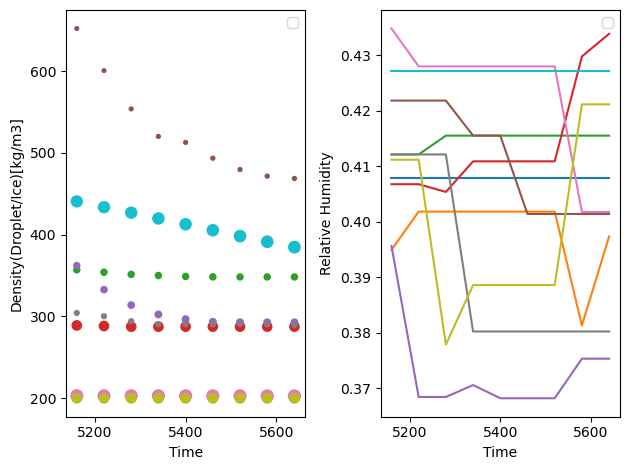

In [48]:
#Density x Deposition Density x Time

unique_droplet = np.unique(trajs['rk_deact'].values)

fig, (ax1, ax2) = plt.subplots(1, 2)

for droplet in unique_droplet:
    time = trajs['time'].loc[trajs['rk_deact'] == droplet]
    density = trajs["density(droplet/ice)[kg/m3]"].loc[trajs['rk_deact'] == droplet]
    relative_humidity = trajs["relative humidity"].loc[trajs['rk_deact'] == droplet]
    # depositionDensity =  trajs["rhod [kg/m3]"].loc[trajs['rk_deact'] == droplet]
    rads = 1e6 * trajs["radius_eq(ice)[m]"].loc[trajs['rk_deact'] == droplet]

    #plot
    ax1.set_ylabel("Density(Droplet/Ice)[kg/m3]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, density, marker="o", s=rads)

    ax2.set_ylabel('Relative Humidity')
    ax2.set_xlabel("Time")
    ax2.plot(time, relative_humidity)

ax1.legend()
ax2.legend()

plt.tight_layout()


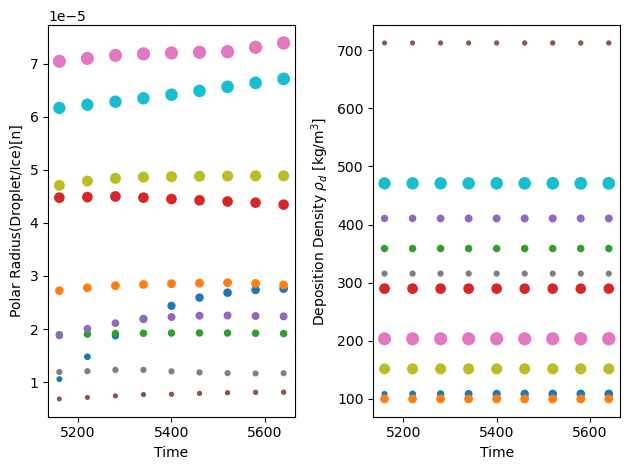

In [49]:
# Radius x Time
unique_droplet = np.unique(trajs['rk_deact'].values)

fig, (ax1, ax2) = plt.subplots(1, 2)

for droplet in unique_droplet:
    time = trajs["time"].loc[trajs['rk_deact'] == droplet]
    radius = trajs["radius_pol(ice)[m]"].loc[trajs['rk_deact'] == droplet]
    rads = 1e6 * trajs["radius_pol(ice)[m]"].loc[trajs['rk_deact'] == droplet]
    depositionDensity =  trajs["rhod [kg/m3]"].loc[trajs['rk_deact'] == droplet]

    #plot
    ax1.set_ylabel("Polar Radius(Droplet/Ice)[n]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, radius, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)
    
plt.tight_layout()
plt.show()

In [50]:
#Deriving the mass from density and size
radius_eq = trajs['radius_eq(ice)[m]'].values
density_droplet = trajs['density(droplet/ice)[kg/m3]'].values
mass_array = []

for i in range(len(radius_eq)):
    volume_particle = ((4/3) * math.pi * (radius_eq[i]**3))
    mass = density_droplet[i] * volume_particle
    mass_array.append(mass)

In [51]:
trajs['Mass of Particle (kg/m^2)'] = mass_array
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time,xi gridbox,yk gridbox,zh gridbox,ijk coordinates,relative humidity,pressure,Potential Temp (K),U Interpolated to Scalar Points (Velocity Field),V Interpolated to Scalar Points (Velocity Field),W Interpolated to Scalar Points (Velocity Field),mean size in um (a),mean size in um (c),ice number mixing ratio (#/kg),mean settling velocity (m/s),mean ice density (kg/m^3),standard deviation of size in um (a_std),standard deviation of size in um (c_std),mean deposition/sublimation rate (kg/kg/s),Air Temperature,Mass of Particle (kg/m^2)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160,2,3,92,"(2, 3, 92)",0.407817,99062.906250,294.635315,0.093614,-0.016802,0.567391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.738884,9.927329e-13
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160,4,2,97,"(4, 2, 97)",0.394934,96786.570312,294.815338,0.140827,-0.068440,-0.040094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.976719,1.691870e-11
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.932392,1.016444e-11
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160,2,3,95,"(2, 3, 95)",0.406761,99062.953125,294.611511,-0.057972,-0.085166,-0.082331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.715274,1.084901e-10
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160,4,0,96,"(4, 0, 96)",0.395657,96786.570312,294.818787,0.063226,-0.128605,-0.111842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.980122,1.003702e-11
5,1464,321.83001,372.833130,9657.9312,0.0,0.0,1.477063e-15,0.000007,0.000007,652.29955,712.73,50299813888,ICE,1464,0.0,1,5160,3,3,96,"(3, 3, 96)",0.421822,97919.968750,294.625092,0.366290,-0.002924,-0.282695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.758798,8.738328e-13
6,1934,341.39308,112.406710,9210.4875,0.0,0.0,2.507824e-13,0.000070,0.000070,203.15980,203.18,24888346624,ICE,1934,0.0,1,5160,3,1,92,"(3, 1, 92)",0.434812,97919.992188,294.643311,-0.277467,0.010454,1.084882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.776860,2.972291e-10
7,3033,471.56190,469.990120,9602.1861,0.0,0.0,1.013003e-14,0.000012,0.000012,304.28089,315.45,69965635584,ICE,3033,0.0,1,5160,4,4,96,"(4, 4, 96)",0.412119,96786.546875,294.770447,0.300467,0.080625,-0.136609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.932392,2.150511e-12
8,3531,419.31608,167.016510,9663.3729,0.0,0.0,5.652341e-14,0.000047,0.000047,200.00119,151.36,63349731328,ICE,3531,0.0,1,5160,4,1,96,"(4, 1, 96)",0.411177,96786.546875,294.758301,0.143696,-0.084877,-0.172918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290.920404,8.731207e-11
9,3883,399.32068,486.724060,9133.8880,0.0,0.0,7.449976e-13,0.000062,0.000062,440.79391,470.91,7641418240,ICE,3883,0.0,1,5160,3,4,91,"(3, 4, 91)",0.427239,97919.765625,294.635712,-0.404576,-0.123097,-0.166732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.769142,4.324274e-10


In [ ]:
#Calculating for relative humidity with respect to ice

#Coefficients of the polynomial expressions used to compute saturation vapor pressures
a0i = 6.11147274
a1i = 0.503160820
a2i = 0.188439774e-1
a3i = 0.420895665e-3
a4i = 0.615021634e-5
a5i = 0.602588177e-7
a6i = 0.385852041e-9
a7i = 0.146898966e-11
a8i = 0.252751365e-14

#Nested for loops to iterate over the indices
for i in range(len('xi gridbox')):
    for k in range(len('yk gridbox')):
        for h in range(len('zh gridbox')):
            

In [52]:
len(np.unique(trajs['time'].values))

9

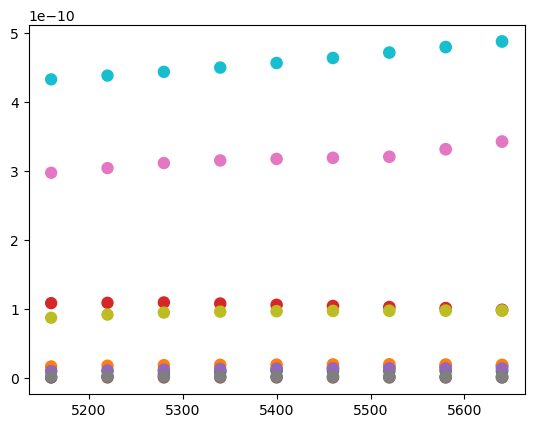

In [53]:
unique_droplet = np.unique(trajs['rk_deact'].values)

for droplet in unique_droplet:
    time = trajs["time"].loc[trajs['rk_deact'] == droplet]
    mass = trajs['Mass of Particle (kg/m^2)'].loc[trajs['rk_deact'] == droplet]
    plt.scatter(time, mass, marker="o", s=rads)

In [60]:
# #Finding the distance each superdroplet traveled in respect to time
unique_droplet = np.unique(trajs['rk_deact'].values)
distance_list = []

def calculate_distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Iterate over each unique droplet
for droplet in unique_droplet:
    droplet_data = trajs[trajs['rk_deact'] == droplet]
    
    # Sort by timestep to ensure correct order
    droplet_data = droplet_data.sort_values(by='time')
    
    # Iterate over each timestep to calculate distance
    for i in range(len(droplet_data) - 1):
        x1, y1, z1 = droplet_data.iloc[i][['x[m]', 'y[m]', 'z[m]']]
        x2, y2, z2 = droplet_data.iloc[i + 1][['x[m]', 'y[m]', 'z[m]']]
        distance = calculate_distance(x1, y1, z1, x2, y2, z2)
        distance_list.append({
            'droplet': droplet,
            'timestep_start': droplet_data.iloc[i]['time'],
            'timestep_end': droplet_data.iloc[i + 1]['time'],
            'distance': distance
        })

distance_df = pd.DataFrame(distance_list)

print(distance_df)

    droplet  timestep_start  timestep_end      distance
0       409            5160          5220     12.190742
1       409            5220          5280     11.824637
2       409            5280          5340     10.240203
3       409            5340          5400      8.472668
4       409            5400          5460      7.922343
5       409            5460          5520      8.577484
6       409            5520          5580      9.720097
7       409            5580          5640     10.680948
8       551            5160          5220     18.269781
9       551            5220          5280     17.720020
10      551            5280          5340     17.453823
11      551            5340          5400     17.729950
12      551            5400          5460     18.783345
13      551            5460          5520     20.288500
14      551            5520          5580     20.838944
15      551            5580          5640     18.521915
16      781            5160          5220     11